<a href="https://colab.research.google.com/github/SurajKande/Pipelining/blob/master/streamlined_data_ingestion_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Data from Flat Files


In [0]:
# to connect gdrive to colab for importing dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

In [0]:
# Get data from CSVs

import pandas as pd

# Reading the CSV file data into dataframe
tax_data = pd.read_csv("/content/gdrive/My Drive/datasets/vt_tax_data_2016.csv")

print(tax_data.head())

   STATEFIPS STATE  zipcode  agi_stub  ...  N11901  A11901  N11902  A11902
0         50    VT        0         1  ...   10820    9734   88260  138337
1         50    VT        0         2  ...   12820   20029   68760  151729
2         50    VT        0         3  ...   10810   24499   34600   90583
3         50    VT        0         4  ...    7320   21573   21300   67045
4         50    VT        0         5  ...   12500   67761   23320  103034

[5 rows x 147 columns]


In [0]:
# Get data from TSVs
tax_data_tsv = pd.read_csv("/content/gdrive/My Drive/datasets/vt_tax_data_2016_1.tsv", sep ="\t")

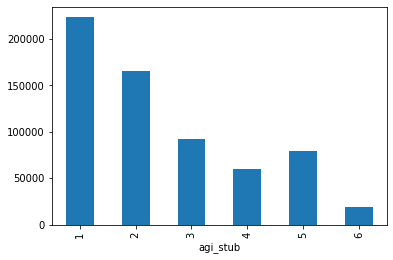

In [0]:
import matplotlib.pyplot as plt

# Plot the total number of tax returns by income group
counts = tax_data.groupby("agi_stub").N1.sum()
counts.plot.bar()
plt.show()

In [0]:
# Import a subset of columns

column_names = ['zipcode','agi_stub','mars1','MARS2','NUMDEP']

# Create data frame from csv using only selected columns
tax_data_selected_columns = pd.read_csv("/content/gdrive/My Drive/datasets/vt_tax_data_2016.csv", usecols = column_names)

print(tax_data_selected_columns.head())

   zipcode  agi_stub  mars1  MARS2  NUMDEP
0        0         1  85090  14170   26200
1        0         2  51960  18820   32310
2        0         3  19540  22650   23610
3        0         4   5830  22190   18860
4        0         5   3900  33800   30330


In [0]:
# Import a file in chunks

tax_data_first500_entries = pd.read_csv("/content/gdrive/My Drive/datasets/vt_tax_data_2016.csv", nrows=500)

print(tax_data_first500_entries.shape)

print(tax_data_first500_entries.head())

(500, 147)
   STATEFIPS STATE  zipcode  agi_stub  ...  N11901  A11901  N11902  A11902
0         50    VT        0         1  ...   10820    9734   88260  138337
1         50    VT        0         2  ...   12820   20029   68760  151729
2         50    VT        0         3  ...   10810   24499   34600   90583
3         50    VT        0         4  ...    7320   21573   21300   67045
4         50    VT        0         5  ...   12500   67761   23320  103034

[5 rows x 147 columns]


In [0]:
tax_data_next500_entries = pd.read_csv("/content/gdrive/My Drive/datasets/vt_tax_data_2016.csv", skiprows=500, nrows=500, header=None, names=list(tax_data_first500_entries))

print(tax_data_next500_entries.shape)

print(tax_data_next500_entries.head())

(500, 147)
   STATEFIPS STATE  zipcode  agi_stub  ...  N11901  A11901  N11902  A11902
0         50    VT     5356         2  ...      50      76     130     212
1         50    VT     5356         3  ...      40     142      50     148
2         50    VT     5356         4  ...       0       0      30      87
3         50    VT     5356         5  ...      30     531      30     246
4         50    VT     5356         6  ...       0       0       0       0

[5 rows x 147 columns]


In [0]:
# Specify data types when loading a flat file 

tax_data.dtypes

STATEFIPS     int64
STATE        object
zipcode       int64
agi_stub      int64
N1            int64
              ...  
A85300        int64
N11901        int64
A11901        int64
N11902        int64
A11902        int64
Length: 147, dtype: object

In [0]:
  ## change the type of zipcodes to string and agi_stub to category
data_types = {"agi_stub": "category", "zipcode": str}

tax_data = pd.read_csv("/content/gdrive/My Drive/datasets/vt_tax_data_2016.csv", dtype=data_types)

tax_data.dtypes    

STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
               ...   
A85300          int64
N11901          int64
A11901          int64
N11902          int64
A11902          int64
Length: 147, dtype: object

In [0]:
# Set custom NA values
 print(tax_data[tax_data.zipcode.isna()])

Empty DataFrame
Columns: [STATEFIPS, STATE, zipcode, agi_stub, N1, mars1, MARS2, MARS4, PREP, N2, NUMDEP, TOTAL_VITA, VITA, TCE, VITA_EIC, RAL, RAC, ELDERLY, A00100, N02650, A02650, N00200, A00200, N00300, A00300, N00600, A00600, N00650, A00650, N00700, A00700, N00900, A00900, N01000, A01000, N01400, A01400, N01700, A01700, SCHF, N02300, A02300, N02500, A02500, N26270, A26270, N02900, A02900, N03220, A03220, N03300, A03300, N03270, A03270, N03150, A03150, N03210, A03210, N03230, A03230, N03240, A03240, N04470, A04470, A00101, N17000, A17000, N18425, A18425, N18450, A18450, N18500, A18500, N18800, A18800, N18300, A18300, N19300, A19300, N19500, A19500, N19530, A19530, N19550, A19550, N19570, A19570, N19700, A19700, N20800, A20800, n21020, a21020, N04800, A04800, N05800, A05800, N09600, A09600, N05780, ...]
Index: []

[0 rows x 147 columns]


In [0]:
null_values = {'zipcode':0 }    # zipcode 0 is not possible

tax_data = pd.read_csv("/content/gdrive/My Drive/datasets/vt_tax_data_2016.csv", na_values=null_values)

print(tax_data[tax_data.zipcode.isna()])

   STATEFIPS STATE  zipcode  agi_stub  ...  N11901  A11901  N11902  A11902
0         50    VT      NaN         1  ...   10820    9734   88260  138337
1         50    VT      NaN         2  ...   12820   20029   68760  151729
2         50    VT      NaN         3  ...   10810   24499   34600   90583
3         50    VT      NaN         4  ...    7320   21573   21300   67045
4         50    VT      NaN         5  ...   12500   67761   23320  103034
5         50    VT      NaN         6  ...    3900   93123    2870   39425

[6 rows x 147 columns]


# Importing Data from spread sheets

In [0]:
# Load pandas as pd
import pandas as pd

# Read spreadsheet
survey_responses = pd.read_excel("/content/gdrive/My Drive/datasets/fcc-new-coder-survey.xlsx")

print(survey_responses.head())

    Age  AttendedBootcamp  ...              SchoolMajor  StudentDebtOwe
0  28.0               0.0  ...                      NaN           20000
1  22.0               0.0  ...                      NaN             NaN
2  19.0               0.0  ...                      NaN             NaN
3  26.0               0.0  ...  Cinematography And Film            7000
4  20.0               0.0  ...                      NaN             NaN

[5 rows x 98 columns]


In [0]:
# Load a portion of a spreadsheet

# Create string of lettered columns to load
col_string = "AD,AW:BA"

survey_responses = pd.read_excel("/content/gdrive/My Drive/datasets/fcc-new-coder-survey.xlsx", usecols=col_string)

print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


In [0]:
# Select a single sheet

# Create dataframe from second worksheet by referencing its position
survey_responses_2017 = pd.read_excel("/content/gdrive/My Drive/datasets/fcc-new-coder-survey.xlsx",sheet_name=1)

In [0]:
# Create dataframe from second worksheet by referencing its name
survey_responses_2017 = pd.read_excel("/content/gdrive/My Drive/datasets/fcc-new-coder-survey.xlsx",sheet_name='2017')

In [0]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel("/content/gdrive/My Drive/datasets/fcc-new-coder-survey.xlsx", sheet_name=None)

In [0]:
# Load file, with Part1StartTime parsed as datetime data
survey_data = pd.read_excel("/content/gdrive/My Drive/datasets/fcc-new-coder-survey.xlsx", parse_dates=['Part1StartTime'])

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())

0   2016-03-29 21:23:13
1   2016-03-29 21:24:59
2   2016-03-29 21:25:37
3   2016-03-29 21:21:37
4   2016-03-29 21:26:22
Name: Part1StartTime, dtype: datetime64[ns]


# Importing data from data bases


query order

1. SELECT
2. AGGERATE FUNCTIONS
3. FROM
4. JOIN
5. ON
6. WHERE
7. GROUP BY

In [0]:
# Connect to a database
# Import sqlalchemy's create_engine() function
from sqlalchemy import create_engine

In [0]:
# Create the database engine
engine = create_engine('sqlite:///data.db')

# Load weather data without any SQL query
weather_data = pd.read_sql("weather", engine)          # weather is the table name

# View the first few rows of data
print(weather_data.head())

In [0]:
# Load weather data with SQL query
query = """
SELECT *
  FROM weather;
"""

# Load weather with the SQL query
weather_data = pd.read_sql(query, engine)

In [0]:
# query to get date, tmax, and tmin from weather
query = """
SELECT date, 
       tmax, 
       tmin
  FROM weather;
"""

# Make a data frame by passing query and engine to read_sql()
temperatures_data = pd.read_sql(query,engine)

In [0]:
# query to get records max temps <= 32 or snow >= 1
query = """
SELECT *
  FROM weather
  WHERE tmax <= 32 
  OR snow >= 1;
"""

# Query database and assign result to wintry_days
winter_days = pd.read_sql(query,engine)

In [0]:
# a query to get month and max tmax by month
query = """
SELECT month, 
       MAX(tmax)
  FROM weather 
 GROUP BY month;"""

# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

In [0]:
# Query to join weather to call records by date columns
query = """
SELECT * 
  FROM hpd311calls                                 
  JOIN weather
  ON hpd311calls.created_date = weather.date;
"""

# Create data frame of joined tables
calls_with_weather = pd.read_sql(query,engine)

# Import data from JSON and API

In [0]:
# Load pandas as pd
import pandas as pd 

# Load the daily report to a data frame
pop_in_shelters = pd.read_json('dhs_daily_report.json')

# View summary stats about pop_in_shelters
print(pop_in_shelters.describe())

In [0]:
import requests
import pandas as pd


# loading data from api
api_url = "https://api.yelp.com/v3/businesses/search"


# Set API parameters - The Yelp API requires the location parameter be set
parameters = {'term': 'cafes',
          	  'location': 'NYC'}

# Set request headers - The Yelp API documentation says "To authenticate API calls with the API Key, set the Authorization HTTP header value as Bearer API_KEY
api_key = 'mhmt6jn3SFPVC1u6pfwgHWQvsa1wmWvCpKRtFGRYlo4mzA14SisQiDjyygsGMV2Dm7tEsuwdC4TYSA0Ai_GQTjKf9d5s5XLSNfQqdg1oy7jcBBh1i7iQUZBujdA_XHYx'
headers = {'Authorization': "Bearer {}".format(api_key)}

# Get data about NYC cafes from the Yelp API
response = requests.get(api_url, 
                headers=headers, 
                params=parameters)

# Extract JSON data from the response
data = response.json()

In [0]:
# Load data to a data frame
cafes = pd.DataFrame(data['businesses'])

# View the data's dtypes
print(cafes.dtypes)